In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv("diabetes.csv")

In [3]:
dataset.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
729,2,92,52,0,0,30.1,0.141,22,0
450,1,82,64,13,95,21.2,0.415,23,0
623,0,94,70,27,115,43.5,0.347,21,0
321,3,112,74,30,0,31.6,0.197,25,1
368,3,81,86,16,66,27.5,0.306,22,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
dataset.corrwith(dataset["Outcome"])

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
dtype: float64

In [9]:
x = dataset.iloc[: , :-1].values
y = dataset.iloc[: , -1].values



In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x = sc.fit_transform(x)

In [12]:
x.shape

(768, 8)

In [14]:
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=1)

In [16]:
X_train.shape

(614, 8)

In [61]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense , Dropout




In [21]:
model = Sequential()

model.add(Dense(32 , activation="relu" , input_dim = 8))
model.add(Dense(1 , activation="sigmoid"))

model.compile(optimizer="Adam" , loss = "binary_crossentropy" , metrics=["accuracy"])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                288       
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
history = model.fit(X_train , y_train , epochs = 10 ,batch_size=32 ,  validation_data = (X_test , y_test)  )

Epoch 1/10
20/20 [==============================] - 1s 11ms/step - loss: 0.7469 - accuracy: 0.4772 - val_loss: 0.7006 - val_accuracy: 0.5260
Epoch 2/10
20/20 [==============================] - 0s 3ms/step - loss: 0.6737 - accuracy: 0.6042 - val_loss: 0.6376 - val_accuracy: 0.6429
Epoch 3/10
20/20 [==============================] - 0s 3ms/step - loss: 0.6235 - accuracy: 0.6938 - val_loss: 0.5892 - val_accuracy: 0.7273
Epoch 4/10
20/20 [==============================] - 0s 3ms/step - loss: 0.5860 - accuracy: 0.7052 - val_loss: 0.5563 - val_accuracy: 0.7662
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 0.5596 - accuracy: 0.7378 - val_loss: 0.5316 - val_accuracy: 0.7597
Epoch 6/10
20/20 [==============================] - 0s 4ms/step - loss: 0.5394 - accuracy: 0.7443 - val_loss: 0.5132 - val_accuracy: 0.7597
Epoch 7/10
20/20 [==============================] - 0s 3ms/step - loss: 0.5233 - accuracy: 0.7557 - val_loss: 0.4984 - val_accuracy: 0.7792
Epoch 8/10
20/20 [=

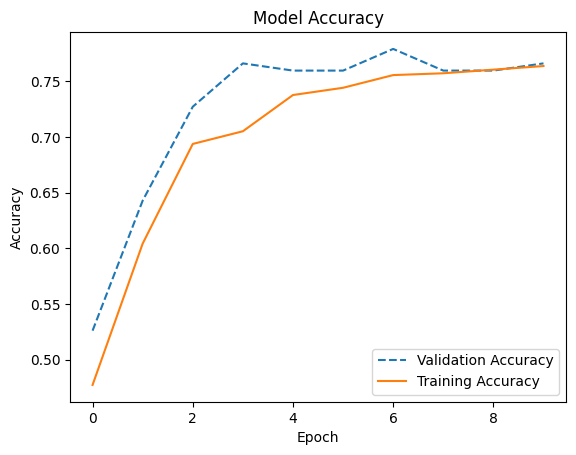

In [29]:
import matplotlib.pyplot as plt

# Assuming `history` is the History object returned by `model.fit()`
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", linestyle='--')
plt.plot(history.history["accuracy"], label="Training Accuracy")

# Adding title and labels
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

# Adding a legend to differentiate between training and validation plots
plt.legend()

# Display the plot
plt.show()


In [31]:
!pip install keras-tuner


   ---------------------------------------- 0.0/129.1 kB ? eta -:--:--
   ------------ --------------------------- 41.0/129.1 kB ? eta -:--:--
   ------------ --------------------------- 41.0/129.1 kB ? eta -:--:--
   ------------ --------------------------- 41.0/129.1 kB ? eta -:--:--
   ------------ --------------------------- 41.0/129.1 kB ? eta -:--:--
   ------------ --------------------------- 41.0/129.1 kB ? eta -:--:--
   ------------ --------------------------- 41.0/129.1 kB ? eta -:--:--
   -------------------------------------- 129.1/129.1 kB 381.1 kB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\umark\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [33]:
import keras_tuner as kt

In [41]:
def check_optimizer(hp):

    model = Sequential()
    model.add(Dense(32 , activation="relu" , input_dim=8))
    model.add(Dense(1 , activation="sigmoid"))

    optimizer = hp.Choice("optimizers" , values = ["adam" , "sgd" , "adagrad" , "rmsprop"])

    model.compile(optimizer=optimizer , loss = "binary_crossentropy" , metrics = ["accuracy"])

    return model

In [42]:
tuner = kt.RandomSearch(
    check_optimizer,
    objective ="val_accuracy",
    max_trials = 5,
    directory = "myDir",
    project_name = "Tuning HyperParameter"
)

In [43]:
tuner.search_space_summary()

Search space summary
Default search space size: 1
optimizers (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'sgd', 'adagrad', 'rmsprop'], 'ordered': False}


In [44]:
tuner.search(X_train , y_train , epochs=6 , validation_data = (X_test , y_test))

Trial 4 Complete [00h 00m 01s]
val_accuracy: 0.6883116960525513

Best val_accuracy So Far: 0.8051947951316833
Total elapsed time: 00h 00m 06s


In [46]:
best = tuner.get_best_hyperparameters(num_trials=1)[0]

In [50]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print all hyperparameters to debug
print("Best hyperparameters:")
for key, value in best_hps.values.items():
    print(f"{key}: {value}")




Best hyperparameters:
optimizers: adam


In [53]:
def num_unit(hp):
    model = Sequential()

    model.add(Dense(hp.Int("units" ,min_value = 8 , max_value = 128 , step=8) , activation="relu" , input_dim = 8))
    model.add(Dense(1 , activation="sigmoid"))

    model.compile(optimizer='Adam' , loss="binary_crossentropy" , metrics=["accuracy"])

    return model

In [54]:
tuner = kt.RandomSearch(
    num_unit,
    objective = "val_accuracy",
    max_trials = 5,
    directory = "myDir",
    project_name = "CheckNode",
)

In [55]:
tuner.search_space_summary()

Search space summary
Default search space size: 1
units (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 128, 'step': 8, 'sampling': 'linear'}


In [56]:
tuner.search(X_train ,y_train , epochs = 6 , validation_data = (X_test , y_test))

Trial 5 Complete [00h 00m 02s]
val_accuracy: 0.7922077775001526

Best val_accuracy So Far: 0.8051947951316833
Total elapsed time: 00h 00m 08s


In [57]:
best_hyp = tuner.get_best_hyperparameters(num_trials=1)[0]

In [60]:
for key, value in best_hyp.values.items():
    print(f"{key}: {value}")

units: 64


In [73]:
def Complete_Param(hp):

    model = Sequential()

    model.add(Dense(hp.Int("units" , min_value = 8 , max_value = 128 , step = 8) , 
                    activation= hp.Choice("activation" , values = ["relu" , "tanh" , "sigmoid"]) , 
                     input_dim = 8 ))
    drop_out_rate = hp.Choice("dropout" , values= [0.0 , 0.2 , 0.6 , 0.4 , 0.9])
    if drop_out_rate>0:
        model.add(Dropout(rate = drop_out_rate))
    for i in range(hp.Int("layers" , 1 , 5)):

        model.add(Dense(hp.Int("units_"+str(i) , min_value=1 , max_value = 256 , step = 16) ,
                        activation=hp.Choice("activation_"+str(i) , values = ["tanh" , "relu" , "sigmoid"]) ))
        
        dropout = hp.Choice("dropout_"+str(i) , values=[0.0 , 0.2 , 0.4 , 0.6 ,0.8 , 0.9])

        if dropout> 0:
            model.add(Dropout(rate = dropout))
    
    model.add(Dense(1 , activation= hp.Choice("activation" , values = ["relu" , "tanh" , "sigmoid"])))

    
    model.compile(optimizer=hp.Choice("Optimzer" , values = ["adam" , "rmsprop" , "sgd" , "adagrad"]) , loss = "binary_crossentropy" , metrics = ["accuracy"])

    return model


In [74]:
tuner = kt.RandomSearch(
    Complete_Param,
    objective = "val_accuracy",
    max_trials = 5,
    directory = "myDir",
    project_name = "Complete Tuning"
)

In [75]:
tuner.search_space_summary()

Search space summary
Default search space size: 8
units (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 128, 'step': 8, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'sigmoid'], 'ordered': False}
dropout (Choice)
{'default': 0.0, 'conditions': [], 'values': [0.0, 0.2, 0.6, 0.4, 0.9], 'ordered': True}
layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 256, 'step': 16, 'sampling': 'linear'}
activation_0 (Choice)
{'default': 'tanh', 'conditions': [], 'values': ['tanh', 'relu', 'sigmoid'], 'ordered': False}
dropout_0 (Choice)
{'default': 0.0, 'conditions': [], 'values': [0.0, 0.2, 0.4, 0.6, 0.8, 0.9], 'ordered': True}
Optimzer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'rmsprop', 'sgd', 'adagrad'], 'ordered': False}


In [76]:
tuner.search(X_train , y_train , epochs = 5 , validation_data = (X_test , y_test)  )

Trial 5 Complete [00h 00m 03s]
val_accuracy: 0.6428571343421936

Best val_accuracy So Far: 0.7597402334213257
Total elapsed time: 00h 00m 13s


In [80]:
best_hyper = tuner.get_best_hyperparameters(num_trials=1)[0]

for hyperparam in best_hyper.values.keys():
    value = best_hyper.get(hyperparam)
    print(f"{hyperparam}: {value}")


units: 56
activation: relu
dropout: 0.6
layers: 1
units_0: 241
activation_0: relu
dropout_0: 0.6
Optimzer: sgd
units_1: 193
activation_1: sigmoid
dropout_1: 0.9
units_2: 113
activation_2: sigmoid
dropout_2: 0.4
units_3: 145
activation_3: tanh
dropout_3: 0.2
units_4: 209
activation_4: tanh
dropout_4: 0.6


In [82]:
model = tuner.get_best_models(num_models=1)[0]
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 56)                504       
                                                                 
 dropout (Dropout)           (None, 56)                0         
                                                                 
 dense_1 (Dense)             (None, 241)               13737     
                                                                 
 dropout_1 (Dropout)         (None, 241)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 242       
                                                                 
Total params: 14483 (56.57 KB)
Trainable params: 14483 (56.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [83]:
tuner.results_summary()

Results summary
Results in myDir\Complete Tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
units: 56
activation: relu
dropout: 0.6
layers: 1
units_0: 241
activation_0: relu
dropout_0: 0.6
Optimzer: sgd
units_1: 193
activation_1: sigmoid
dropout_1: 0.9
units_2: 113
activation_2: sigmoid
dropout_2: 0.4
units_3: 145
activation_3: tanh
dropout_3: 0.2
units_4: 209
activation_4: tanh
dropout_4: 0.6
Score: 0.7597402334213257

Trial 1 summary
Hyperparameters:
units: 104
activation: sigmoid
dropout: 0.0
layers: 3
units_0: 1
activation_0: tanh
dropout_0: 0.0
Optimzer: sgd
units_1: 81
activation_1: tanh
dropout_1: 0.6
units_2: 17
activation_2: sigmoid
dropout_2: 0.6
units_3: 1
activation_3: sigmoid
dropout_3: 0.4
units_4: 97
activation_4: sigmoid
dropout_4: 0.9
Score: 0.701298713684082

Trial 0 summary
Hyperparameters:
units: 120
activation: relu
dropout: 0.4
layers: 5
units_0: 145
activation_0: tanh
dropout_0: 0.9
Optimzer: rmsprop
u

In [94]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=3 , 
    restore_best_weights=True
)

In [95]:
history = model.fit(X_train , y_train , epochs = 20 , initial_epoch=6 , validation_data = (X_test , y_test) , callbacks=[early_stopping])

Epoch 7/20
20/20 [==============================] - 0s 13ms/step - loss: 4.4269 - accuracy: 0.7003 - val_loss: 3.2948 - val_accuracy: 0.7857
Epoch 8/20
20/20 [==============================] - 0s 5ms/step - loss: 4.2996 - accuracy: 0.7117 - val_loss: 3.8028 - val_accuracy: 0.7468
Epoch 9/20
20/20 [==============================] - 0s 5ms/step - loss: 5.0404 - accuracy: 0.6580 - val_loss: 3.3550 - val_accuracy: 0.7662
Epoch 10/20
20/20 [==============================] - 0s 5ms/step - loss: 4.7758 - accuracy: 0.6792 - val_loss: 3.3260 - val_accuracy: 0.7597
